# Task 4

**My Homework Link:**

https://github.com/bbarajas429/eds220-hwk-1

In this task, make at least 5 commits at moments you think are adequate. We'll look at your repo to check commit history. Err on the side of commenting too much for now to get in the habit.

Add comments for all your code. Err on the side of commenting too much for now.

Comments in each exercise and commits will count towards your grade.

This task covers topics we will see on Wednesday Oct. 11. You might want to wait until after that class to solve it.

## Acknowledgement
This task was adapted from the *Pandas Fundamentals with Earthquake Data* assignment from the e-book [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html)

## About the data

For this task we are going to use simplified data from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). This dataset is in tabular format and has the following columns:

- time = date and time of event (all events from 2014)
- latitude = decimal degrees [-90,90]
- longitude = decimal degrees [-360,360]
- depth = depth of the event (km)
- mag =  magnitude of event
- id = event identifier
- place = where the event took place
- type = type of event

## 1 

a. Import pandas (always with standard abbreviation!).

b. Use `pd.read_csv()` to import the `earthquake_data.csv` dataset and store it as `raw_eqk` (variable name).

c. Look at the head of the dataframe.

In [ ]:
# import pandas
import pandas as pd

In [ ]:
# read in CSV data from data folder
raw_eqk = pd.read_csv('/Users/bbarajas429/eds-220/eds220-hwk-1/data/earthquake_data.csv')

# check that data was read in properly
raw_eqk.head()

## 2
a. Print the shape of the `raw_eqk` dataframe.

b. Print the type of `raw_eqk`'s shape.

c. Print *only* the number of rows by accessing it from `raw_eqk`'s shape. HINT: how do you index an element in a tuple?

In [ ]:
# print the shape of raw_eqk df using .shape
raw_eqk.shape

In [ ]:
# check the type of shape
type(raw_eqk.shape)

In [50]:
# print rows using position and shape
raw_eqk.shape[0]

120108

## 3

Get the unique values of the type of events.

In [37]:
# get type of events by using .unique() on the 'type' column
raw_eqk.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

# 4

a. Select only earthquake events and store them as `eqk` (variable name)

b. Update the index of `eqk` to be the `id` column of the dataframe. 

c. Check the new index by viewing the first 3 rows of `eqk`.

In [53]:
# create subset only containing rows where the type col == earthquake
eqk = raw_eqk[raw_eqk['type']=='earthquake']

# check that the only type included is 'earthquake'
eqk.type.unique()

array(['earthquake'], dtype=object)

In [57]:
# set the index to the id column 
eqk = eqk.set_index('id')

In [58]:
# view first 3 rows of eqk to check index
eqk.head(3)

,time,latitude,longitude,depth,mag,place,type
id,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,"12km NNW of North Nenana, Alaska",earthquake


# 5

How many events were left out of `raw_eqk` when you selected ony earthqake events? 
__ANS__: Filtering to keep only rows with earthquake left 1710 rows.

HINT: There are *many* ways you can get this information. One could be to use (2).

In [46]:
# view number of rows for full df
len_raw = len(raw_eqk)

# view number of rows for earthquake df
len_eqk = len(eqk)

# subtract number of rows from each
print(f" The earthquake data has {len_raw - len_eqk} less rows than the raw_eqk data.")      

 The earthquake data has 1710 less rows than the raw_eqk data.


# 6
Without creating any new variables, plot a histogram of the eartquake's magnitudes (`eqk` data). Add a title and change the color of your graph.

<AxesSubplot:title={'center':'Earthquake Magnitude'}, ylabel='Frequency'>

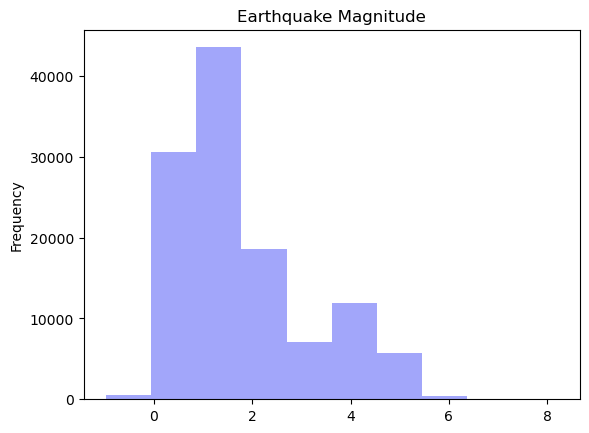

In [61]:
# plot the mag column from eqk data
eqk.mag.plot(kind='hist', #change plot type to histogram
            title = 'Earthquake Magnitude', # add plot title
            color = '#A2A6FA') #change color, I used a hex code here

# 7

a. Create a new variable `top20` with the 20 earthquakes with largest magnitude. HINT: [`pandas.Series.nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html)

b. Create a bar plot showing the magnitude of the top 20 earthquakes. Update the title, x-axis label, y-axis label, and color of the bars. 

c. What is the role of the `top20` index in the graph? What would have happened if we had not updated the index?

In [64]:
# create subset w/top 20 magnitudes
top20 = eqk.mag.nlargest(20)

<AxesSubplot:title={'center':'Magnitude of 20 Largest Earthquakes'}, xlabel='Earthquale ID', ylabel='Magnitude'>

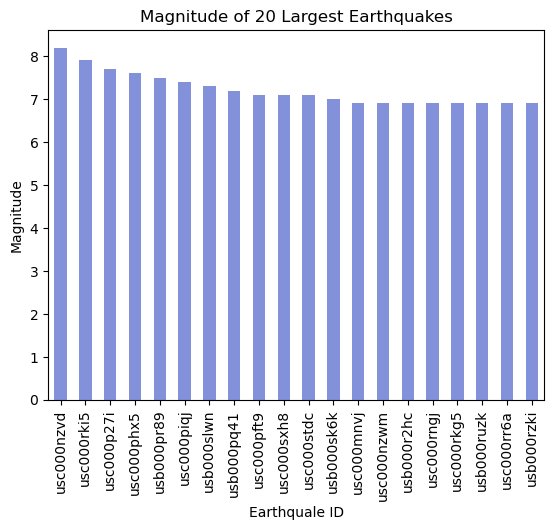

In [70]:
# create barplot w/magnitude of top 20 earthquakes
top20.plot(kind='bar', # specify plot type
           title="Magnitude of 20 Largest Earthquakes", #add title
           xlabel='Earthquale ID', #change x-axis label
          ylabel='Magnitude', #change y-axis label
          color='#8390DA') #change color

__ANS 7c__: If the index had not been updated, the x-axis would have displayed the numerical index (0-19)

The bar graph only requires one variable, which in this case was magnitude. Since there's no variable to display along

# 8 
We are interested in place, magnitude and depth of the top 20 earthquakes with largest magnitude. Select this data from the `eqk` data frame.

HINT: This is a "select rows and columns simultaneously" from `eqk` exercise. To select the rows you could use the index of `top20`.

In [ ]:
# solve exercise here

# 9 

Without creating any new variables, visualize the locations of eartquakes with magnitude greter than 5 by creating a scatter plot of their latitude and longitude. Make the following adjustments to the basic plot:
- update the title
- color the points by magnitude (HINT: [check the `c` parameter here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html))
- adjust the `alpha` (transparency) argument
- adjust the `colormap` argument to maket it look prettier. [Click for ideas of sequential colormaps.](https://matplotlib.org/stable/users/explain/colors/colormaps.html)


In [ ]:
# solve exercise here